In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='fine') #這行改成import cifar100

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

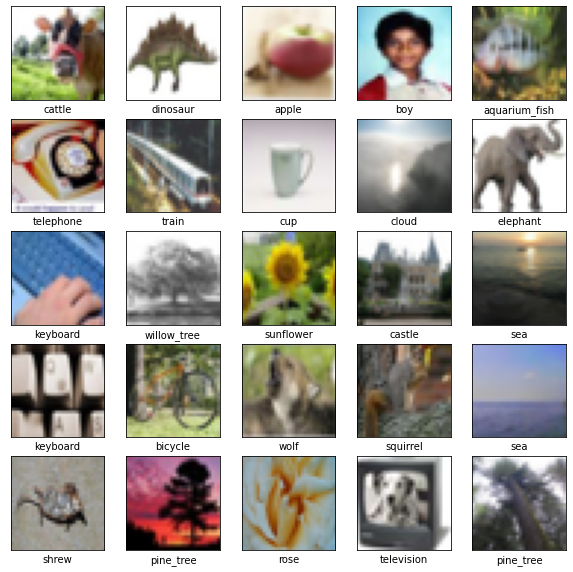

In [29]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [30]:
model = models.Sequential()
model.add(layers.ZeroPadding2D((96), input_shape=(32, 32, 3))) #把32*32 padding成224*224 
#註論文中input size的224*224後續被許多人認為有些問題。按照論文內容模型架構是227*227比較合理。(因此網路上看到的AlexNet code基本上都是刻成227*227)
#但老師這堂課應該只是要我們練習刻AlexNet的Model而且說要resize成224*224。因此暫時我就按照老師所說的做不刻成常見的227*227
#下面為AlexNet之架構
model.add(layers.Conv2D(96,(11,11),strides=(4,4),activation='relu',kernel_initializer='uniform'))
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(layers.Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(layers.Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(layers.Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_7 (ZeroPaddin (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 384)      

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,     #老師說epoch跑個5次就好，TEST結果預期一樣幾乎完全沒有效果XD
                    validation_data=(test_images, test_labels))    

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 36s 714us/sample - loss: 4.6122 - accuracy: 0.0100 - val_loss: 4.6122 - val_accuracy: 0.0100
Epoch 2/5
50000/50000 [==============================] - 35s 699us/sample - loss: 4.6122 - accuracy: 0.0100 - val_loss: 4.6122 - val_accuracy: 0.0100
Epoch 3/5
50000/50000 [==============================] - 35s 702us/sample - loss: 4.6122 - accuracy: 0.0100 - val_loss: 4.6122 - val_accuracy: 0.0100
Epoch 4/5
50000/50000 [==============================] - 35s 699us/sample - loss: 4.6122 - accuracy: 0.0100 - val_loss: 4.6122 - val_accuracy: 0.0100
Epoch 5/5
50000/50000 [==============================] - 35s 700us/sample - loss: 4.6122 - accuracy: 0.0100 - val_loss: 4.6122 - val_accuracy: 0.0100


10000/10000 - 2s - loss: 4.6122 - accuracy: 0.0100


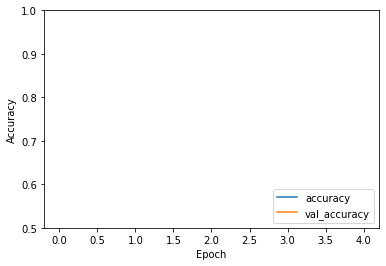

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
print(test_acc)

0.01
